## Martin Iniguez de Onzono

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import integrate
from scipy.signal import find_peaks

## 2. Numerical solutions to ODEs

### a) Define a Python function that performs the Euler method

In [2]:
def euler(f_func, x_0, t_max, dt):
    iterat = int(np.floor(t_max/dt))
    x = np.zeros(iterat)
    x[0]=x_0
    
    for i in range(1,iterat):
        x[i] = x[i-1]+f_func(x[i-1],dt*(i-1)) *dt        
    return x

def exponential(x,t):
    return -x

def square_root_2(x,t):
    return x**(-1)

def exp_subtract(x,t):
    return 1-x

def logistic(x,t):
    return x-x**2


### b)  Solve the problems from Ex. 1 with the Euler method.

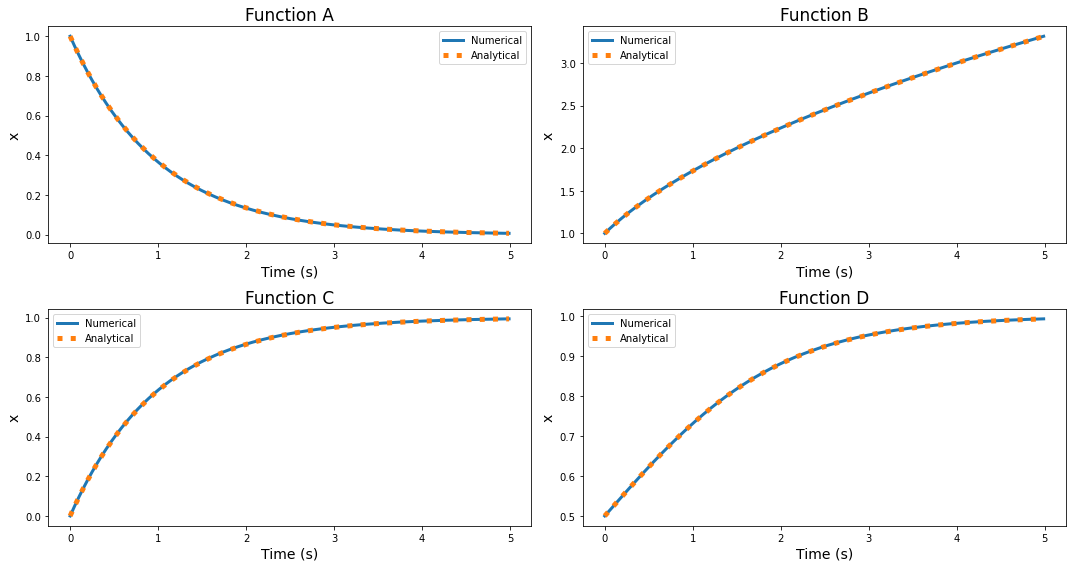

In [3]:
dt = 0.01
time_max = 5
t = np.arange(0,time_max,dt)

x= np.zeros((4,int(np.floor(time_max/dt))))

x[0,:] = euler(exponential,1,time_max,dt)
x[1,:] = euler(square_root_2,1,time_max,dt)
x[2,:] = euler(exp_subtract,0,time_max,dt)
x[3,:] = euler(logistic,0.5,time_max,dt)


titles = ['A','B','C','D']


fig, ax = plt.subplots(figsize = (15,8), nrows =2, ncols=2)

num=0
for i in range (0,2):
    
    for j in range(0,2):
        
        ax[i][j].plot(t,x[num,:],label='Numerical',linewidth=3)
        
        if num==0:
            analytical = np.exp(-t)
        elif num==1:
            analytical = np.sqrt(2*t+1)
        elif num==2:
            analytical = 1-np.exp(-t)
        elif num==3:
            analytical = 1/(1+np.exp(-t))
            
        ax[i][j].plot(t,analytical,label='Analytical',linestyle='dotted',linewidth=5)
        
        ax[i][j].set_xlabel('Time (s)',fontsize=14)
        ax[i][j].set_ylabel('x',fontsize=14)
        ax[i][j].set_title('Function ' + str(titles[num]),fontsize=17)
        ax[i][j].legend()
        
        num +=1

fig.tight_layout()

As we can see in the previous graphs, the numerical and analytical functions are equal for such a small step size on the time.

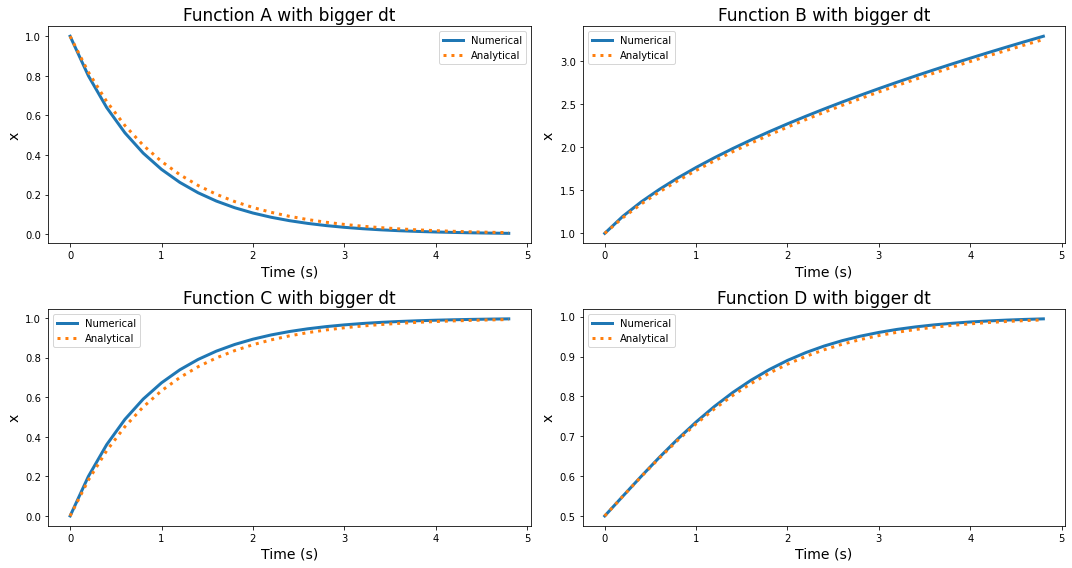

In [4]:
dt = 0.2
t = np.arange(0,time_max,dt)

x_eu= np.zeros((4,int(np.floor(time_max/dt))))

x_eu[0,:] = euler(exponential,1,time_max,dt)
x_eu[1,:] = euler(square_root_2,1,time_max,dt)
x_eu[2,:] = euler(exp_subtract,0,time_max,dt)
x_eu[3,:] = euler(logistic,0.5,time_max,dt)

fig, ax = plt.subplots(figsize = (15,8), nrows =2, ncols=2)

num=0
for i in range (0,2):
    
    for j in range(0,2):
        
        ax[i][j].plot(t,x_eu[num,:],label='Numerical',linewidth=3)
        
        if num==0:
            analytical = np.exp(-t)
        elif num==1:
            analytical = np.sqrt(2*t+1)
        elif num==2:
            analytical = 1-np.exp(-t)
        elif num==3:
            analytical = 1/(1+np.exp(-t))
            
        ax[i][j].plot(t,analytical,label='Analytical',linestyle='dotted',linewidth=3)
        
        ax[i][j].set_xlabel('Time (s)',fontsize=14)
        ax[i][j].set_ylabel('x',fontsize=14)
        ax[i][j].set_title('Function ' + str(titles[num]) + ' with bigger dt',fontsize=17)
        ax[i][j].legend()
        
        num +=1

fig.tight_layout()

Having a smaller step size on the time scale for the computation of the Euler method though, will make the functions diverge a little, as we can see the graphs above. Thus, we can say that for very small dt, the Euler method is a good method to approximate our functions.

### c) Try the Runge-Kutta method and compare it to Euler's

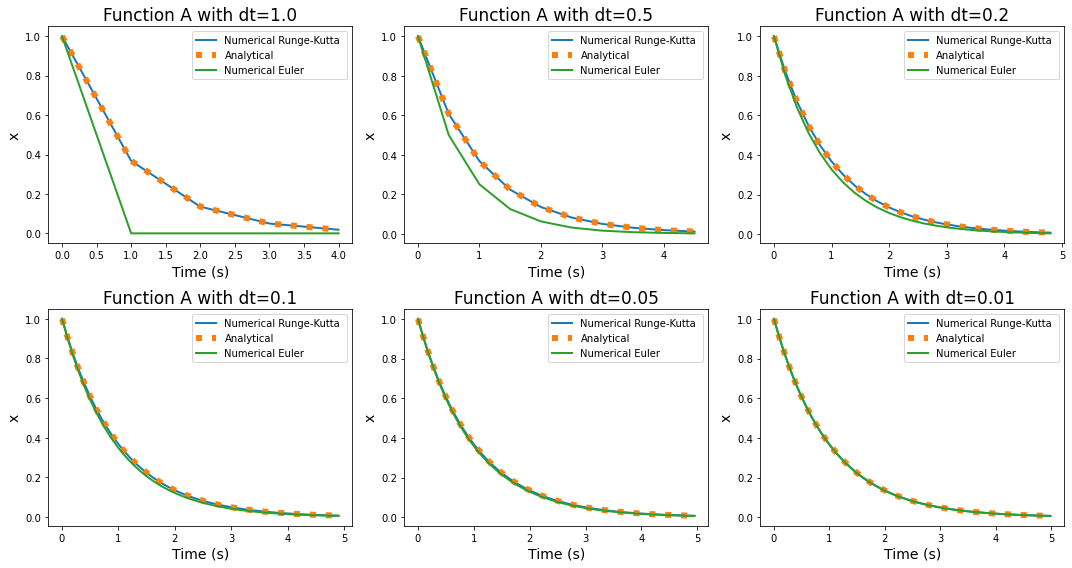

In [5]:
dt=np.array([1,0.5,0.2,0.1,0.05,0.01])

num = 0

fig, ax = plt.subplots(figsize = (15,8), nrows =2, ncols=3)

for i in range(0,2):
    
    for j in range(0,3):
        
        t = np.arange(0,time_max,dt[num])
        analytical = np.exp(-t)

        x_eu = euler(exponential,1,time_max,dt[num])
        x_runge = integrate.odeint(exponential, 1, t)

        mse_eu = (analytical - x_eu)**2
        mse_runge = (analytical - x_runge)**2


        ax[i][j].plot(t,x_runge,label='Numerical Runge-Kutta ',linewidth=2)
        ax[i][j].plot(t,analytical,label='Analytical',linestyle='dotted',linewidth=6)
        ax[i][j].plot(t,x_eu,label='Numerical Euler ',linewidth=2)

        ax[i][j].set_xlabel('Time (s)',fontsize=14)
        ax[i][j].set_ylabel('x',fontsize=14)
        ax[i][j].set_title('Function A with dt=' + str(dt[num]),fontsize=17)
        ax[i][j].legend()


        num += 1
        
fig.tight_layout()

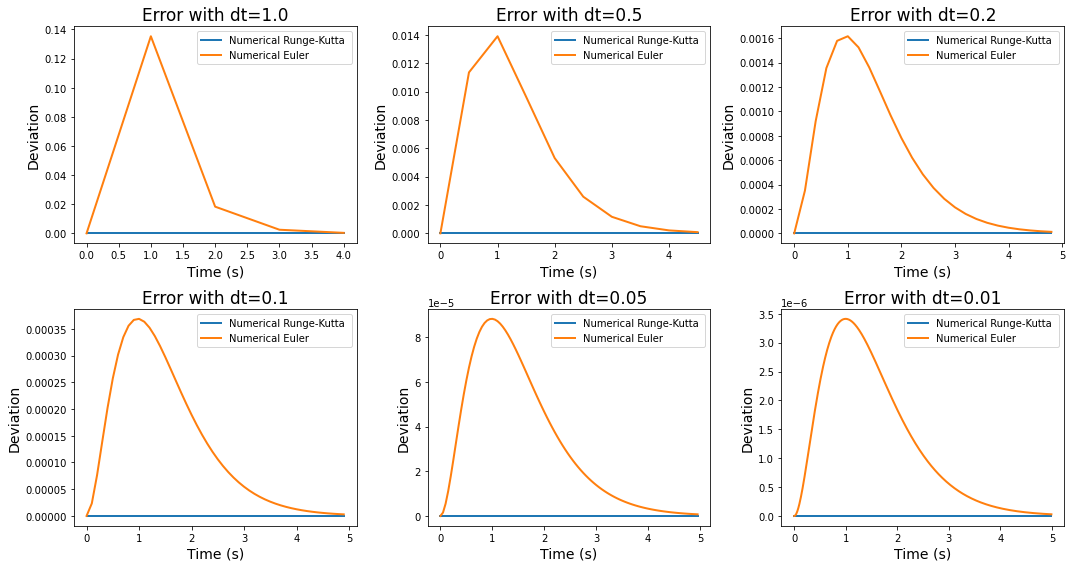

In [6]:
dt=np.array([1,0.5,0.2,0.1,0.05,0.01])
time_max = 5
num = 0

fig, ax = plt.subplots(figsize = (15,8), nrows =2, ncols=3)

for i in range(0,2):
    
    for j in range(0,3):
        
        t = np.arange(0,time_max,dt[num])
        analytical = np.exp(-t)

        x_eu = euler(exponential,1,time_max,dt[num])
        x_runge = integrate.odeint(exponential, 1, t)

        mse_eu = (analytical - x_eu)**2
        mse_runge = (analytical - x_runge.T)**2


        ax[i][j].plot(t,mse_runge.T,label='Numerical Runge-Kutta ',linewidth=2)
        ax[i][j].plot(t,mse_eu,label='Numerical Euler ',linewidth=2)

        ax[i][j].set_xlabel('Time (s)',fontsize=14)
        ax[i][j].set_ylabel('Deviation',fontsize=14)
        ax[i][j].set_title('Error with dt=' + str(dt[num]),fontsize=17)
        ax[i][j].legend()
        
        num += 1

fig.tight_layout()      


As it can be seen, using a small dt is necessary for convergence in the Euler method case: the smaller the dt, the smaller the errors. However, the Runge-Kutta method is accurate already with a dt = 1. It can be seen that Runge-Kutta therefore is a better method to numerically represent an ODE: its squared error is 0 for all dt at all time-points.

## 3. Passive membrane

### a) Euler method on homogeneous current

In [7]:
def voltage_a(v,t):
    r_i = 1000*(10**-9)*(10**7) # This way, we get mV = 1000* A * Ohm
    return (-v + r_i - 80 )/ 10

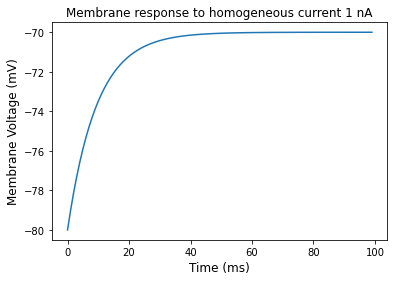

In [8]:
em=-80 # We choose mV as our unit

dt = 1 # dt represents ms since our dv/dt has mV/ms units
time_max = 100 # ms
t = np.arange(0,time_max,dt) # in ms

v_eu = euler(voltage_a,em,time_max,1)

plt.plot(t,v_eu)
plt.xlabel('Time (ms)',fontsize=12)
plt.ylabel('Membrane Voltage (mV)',fontsize=12);
plt.title('Membrane response to homogeneous current 1 nA');

### b) Sinusoidal time-dependent current

In [9]:
def voltage_b(v,i0,freq,t,rm,tm):
    r_i = 1000* i0*np.sin(2*np.pi*t*freq/1000) *rm # This way, we get mV = 1000* A * Ohm
    return (-v + r_i - 80 )/ tm

def euler_2b(x_0, t_max, dt,freq,i0,rm,tm):
    iterat = int(np.floor(t_max/dt))
    x = np.zeros(iterat)
    x[0]=x_0
    
    for i in range(1,iterat):
        x[i] = x[i-1] + voltage_b(x[i-1],i0,freq,dt*(i-1),rm,tm) *dt        
    return x

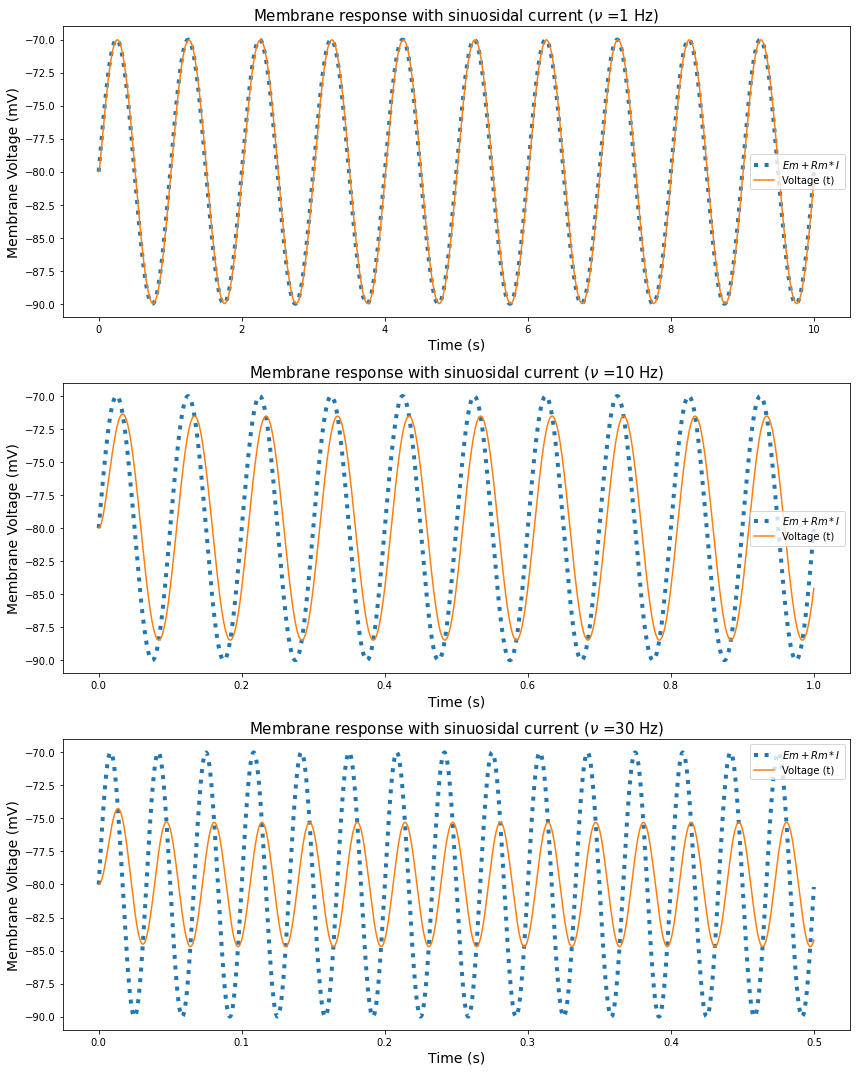

In [13]:
em = -80 # We choose mV as our unit
rm = 10**7
tm = 10

dt= 0.1 # dt represents ms since our dv/dt has mV/ms units
time_max = ([10000,1000,500]) # ms

freq = [1,10,30] # in Hz
i0 = 10**-9

fig, ax = plt.subplots(figsize = (12,15), nrows =3, ncols=1)

for i in range (0,len(freq)):
    
    t = np.arange(0,time_max[i],dt) # in ms
    i_t = i0*np.sin(2*np.pi*t*freq[i]/1000)
    v_eu_b = euler_2b(em,time_max[i],dt,freq[i],i0,rm,tm)
    
    t_s = t/1000
    baseline = em+i_t*1000*rm
    
    ax[i].plot(t_s,baseline,label = r'$Em + Rm*I$',linestyle='dotted',linewidth=4)
    ax[i].plot(t_s,v_eu_b,label='Voltage (t)')
    ax[i].set_xlabel('Time (s)',fontsize=14)
    ax[i].set_ylabel('Membrane Voltage (mV)',fontsize=14)
    ax[i].set_title(r'Membrane response with sinuosidal current ($\nu$ =' + str(freq[i]) + ' Hz)',fontsize=15)
    ax[i].legend()
  
fig.tight_layout();

### c) Calculate the voltage Amplitude A and phase lag

In [11]:
dt= 0.01 # dt represents ms since our dv/dt has mV/ms unit

freq = np.arange(1,101,1) # in Hz

time_max = np.floor(10000/freq) # ms
i0 = 10**-9

A = np.zeros(len(freq))
phase = np.zeros(len(freq))

time_max

for i in range (0,len(freq)):
    
    t = np.arange(0,time_max[i],dt) # in ms
    i_t = i0*np.sin(2*np.pi*t*freq[i]/1000)
    baseline = em+i_t*1000*rm
    
    v_eu_b = euler_2b(em,time_max[i],dt,freq[i],i0,rm,tm)
    
    in_peaks,prop = find_peaks(v_eu_b)
    in_peaks = in_peaks[1:len(in_peaks)]
    A [i] = np.mean(v_eu_b[in_peaks])-np.mean(v_eu_b)
    
    in_peaks_base,prop = find_peaks(baseline)
    in_peaks_base = in_peaks_base[1:len(in_peaks_base)]
    phase_index = round(np.mean(in_peaks - in_peaks_base),0)
    phase[i] = phase_index*dt* (freq[i]/1000)*2*np.pi

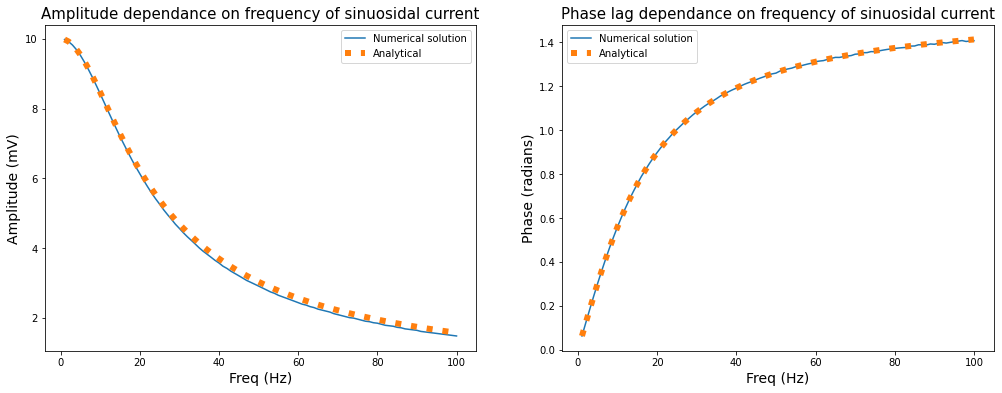

In [12]:
A_analytical = i0 * rm * np.sqrt(1/(1+((2*np.pi*freq*tm/1000)**2)))*1000 # Multiplying by 1000 because we are in mV
phase_analytical = np.arctan(2*np.pi*freq*tm/1000)

fig, ax = plt.subplots(figsize = (17,6), nrows =1, ncols=2)

ax[0].plot(freq,A,label='Numerical solution')
ax[0].plot(freq,A_analytical,label='Analytical',linestyle='dotted',linewidth=6)
ax[0].set_xlabel('Freq (Hz)',fontsize=14)
ax[0].set_ylabel('Amplitude (mV)',fontsize=14)
ax[0].set_title('Amplitude dependance on frequency of sinuosidal current',fontsize=15)
ax[0].legend()

ax[1].plot(freq,phase,label='Numerical solution')
ax[1].plot(freq,phase_analytical,label='Analytical',linestyle='dotted',linewidth=6)
ax[1].set_xlabel('Freq (Hz)',fontsize=14)
ax[1].set_ylabel('Phase (radians)',fontsize=14)
ax[1].set_title('Phase lag dependance on frequency of sinuosidal current',fontsize=15)
ax[1].legend();

It can be seen that the numerical solution performed by finding the peaks of the Voltage(t) is almost the same as the one drawn analitically.